In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing dataset

In [2]:
data, target = load_wine(return_X_y=True)

Scaling data

In [3]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

Data and target examples

In [4]:
print("Data ",data[130],"\ntarget ",target[130])

Data  [-0.17370046 -0.88540853 -0.17003496 -0.44890919  1.56283851 -1.2580103
 -0.78236081 -1.22360954 -1.14042959 -0.41444092 -0.86627756 -1.86680504
 -0.37224585] 
target  2


Getting indexes in order to plot with different colors

In [5]:
print(len(target[target==0]))
print(len(target[target==1]))
print(len(target[target==2]))

59
71
48


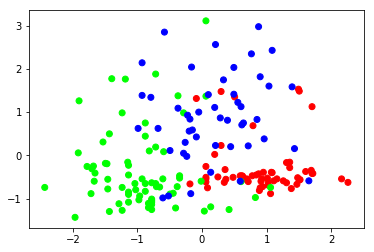

In [6]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
pyplot.scatter(data[:, 0], data[:, 1], c=target, cmap=cmap_bold)
pyplot.show()

### Splitting data in Train (50%), Validation (20%) and Test (30%) 

In [7]:
Data_train, Data_test, Target_train, Target_test = train_test_split(data, target, test_size=0.30, random_state=45)
Data_train, Data_validation, Target_train, Target_validation = train_test_split(Data_train, Target_train, test_size=2/7, random_state=41)

In [8]:
#plotting method
step_size = 0.02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
def plot_boundaries(model, data_train, target_train, n_neighbors):
    data_0, data_1 = np.meshgrid(np.arange(data_train[:, 0].min() - 1, data_train[:, 0].max() + 1 , step_size),
                     np.arange(data_train[:, 1].min()-1, data_train[:, 1].max()+1, step_size))
    predictions = model.predict(np.c_[data_0.ravel(), data_1.ravel()])

    # Put the result into a color plot
    predictions = predictions.reshape(data_0.shape)
    pyplot.figure()
    pyplot.pcolormesh(data_0, data_1, predictions, cmap=cmap_light)

    # Plot also the training points
    pyplot.scatter(data_train[:, 0], data_train[:, 1], c=target_train, cmap=cmap_bold)
    pyplot.xlim(data_0.min(), data_0.max())
    pyplot.ylim(data_1.min(), data_1.max())
    pyplot.title("3-Class classification (k = %i)"
              % (n_neighbors))

    pyplot.show()

## kNN

### Hyperparameters

Setting values for k

In [9]:
K = [1, 3, 5, 7]

Plotting decision boundaries and predicting on validation split with different values for k

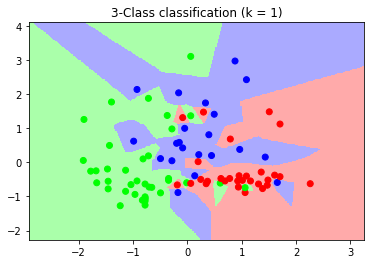

Result for validation split with k=  1   55.55555555555556 %


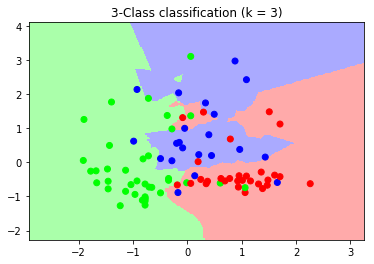

Result for validation split with k=  3   66.66666666666666 %


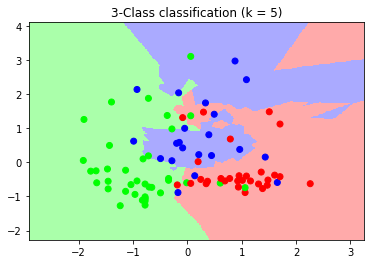

Result for validation split with k=  5   55.55555555555556 %


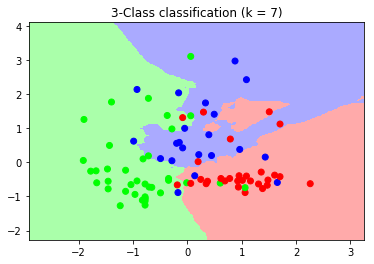

Result for validation split with k=  7   66.66666666666666 %


In [10]:
accuracies = []

for k in K:
    model = KNeighborsClassifier(k, weights='uniform')
    model.fit(Data_train[:, :2], Target_train)
    
    #Plotting boundaries
    plot_boundaries(model, Data_train, Target_train, k)
    
    #Predicting on validation split
    predictions_valid = model.predict(Data_validation[:, :2])
    score_valid = (predictions_valid[predictions_valid==Target_validation].sum())/len(Target_validation)
    print("Result for validation split with k= ",k," ",score_valid*100,"%")
    accuracies.append(score_valid)

Plotting accuracies for each value of k

Text(0, 0.5, 'Accuracy')

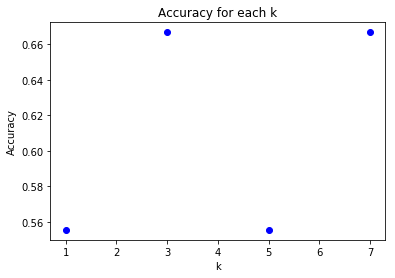

In [11]:
pyplot.plot(K, accuracies, 'bo')
pyplot.title('Accuracy for each k')
pyplot.xlabel('k')
pyplot.ylabel('Accuracy')

Extracting best value for k, based on validation set

In [12]:
best_k = np.argmax(accuracies)
best_k = K[best_k]
print("Best value is ",best_k)

Best value is  3


### Evaluating on the test set

In [13]:
#Setting k to its best value
model = KNeighborsClassifier(best_k, weights='uniform')
model.fit(Data_train[:, :2], Target_train)

test_predictions = model.predict(Data_test[:, :2])

In [14]:
score_test = (test_predictions[test_predictions==Target_test].sum())/len(Target_test)
print("Result for test set with k= ",best_k," ",score_test*100,"%")

Result for test set with k=  3   75.92592592592592 %


## SVM

In [15]:
def plot_boundaries_svm(model, data_train, target_train, c, l=-1000):
    data_0, data_1 = np.meshgrid(np.arange(data_train[:, 0].min() - 1, data_train[:, 0].max() + 1 , step_size),
                     np.arange(data_train[:, 1].min()-1, data_train[:, 1].max()+1, step_size))
    predictions = model.predict(np.c_[data_0.ravel(), data_1.ravel()])

    # Put the result into a color plot
    predictions = predictions.reshape(data_0.shape)
    pyplot.figure()
    pyplot.pcolormesh(data_0, data_1, predictions, cmap=cmap_light)

    # Plot also the training points
    pyplot.scatter(data_train[:, 0], data_train[:, 1], c=target_train, cmap=cmap_bold)
    pyplot.xlim(data_0.min(), data_0.max())
    pyplot.ylim(data_1.min(), data_1.max())
    if l == -1000:
        pyplot.title("3-Class classification (c = %i)"
              % (c))
    else:
        pyplot.title("3-Class classification (c = %i, l = %f)"
              % (c, l))

    pyplot.show()

### Hyperparameters

Setting possible values for C

In [16]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

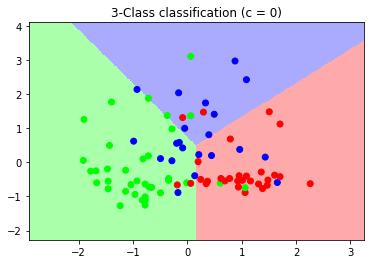

Result for validation split with c=  0.001   66.66666666666666 %


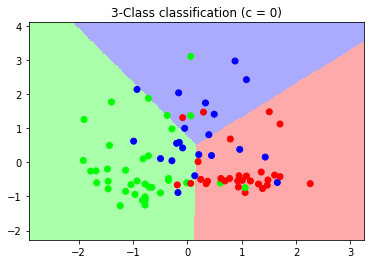

Result for validation split with c=  0.01   66.66666666666666 %


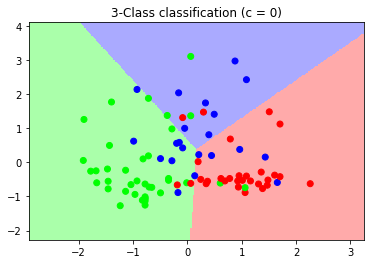

Result for validation split with c=  0.1   66.66666666666666 %


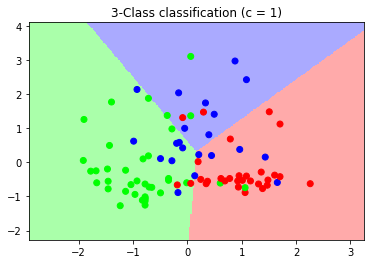

Result for validation split with c=  1   66.66666666666666 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


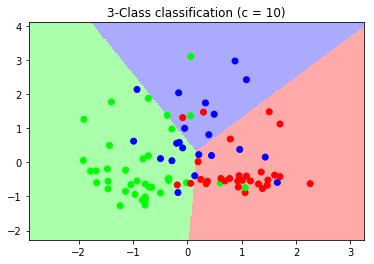

Result for validation split with c=  10   66.66666666666666 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


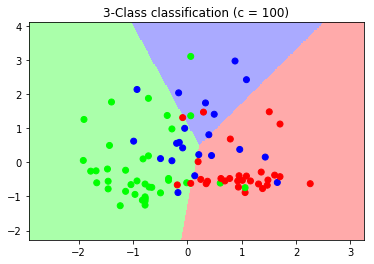

Result for validation split with c=  100   66.66666666666666 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


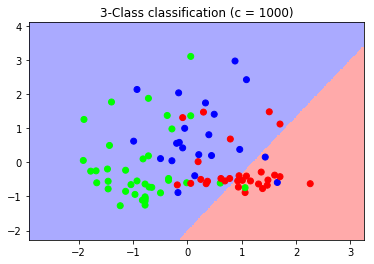

Result for validation split with c=  1000   41.66666666666667 %


In [17]:
accuracies = []
for c in C:    
    modelSVM = svm.LinearSVC(C=c)
    modelSVM.fit(Data_train[:,:2], Target_train)
    
    #Plotting boundaries
    plot_boundaries_svm(modelSVM, Data_train, Target_train, c)
    
    #Predicting on validation split
    predictions_valid = modelSVM.predict(Data_validation[:, :2])
    score_valid = (predictions_valid[predictions_valid==Target_validation].sum())/len(Target_validation)
    print("Result for validation split with c= ",c," ",score_valid*100,"%")
    accuracies.append(score_valid)

Plotting accuracies

Text(0, 0.5, 'Accuracy')

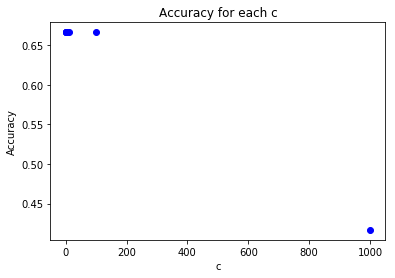

In [18]:
pyplot.plot(C, accuracies, 'bo')
pyplot.title('Accuracy for each c')
pyplot.xlabel('c')
pyplot.ylabel('Accuracy')

Extracting best value for c, based on validation set

In [19]:
best_c = np.argmax(accuracies)
best_c = C[best_c]
print("Best value is ",best_c)

Best value is  0.001


### Evaluating on the test set

In [20]:
#Setting c to its best value
modelSVM = svm.LinearSVC(C=best_c)
modelSVM.fit(Data_train[:,:2], Target_train)

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [21]:
test_predictions = modelSVM.predict(Data_test[:, :2])
score_test = (test_predictions[test_predictions==Target_test].sum())/len(Target_test)
print("Result for test set with c = ",best_c," ",score_test*100,"%")

Result for test set with c =  0.001   53.70370370370371 %


## RBF Kernel

### Hyperparameters

/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


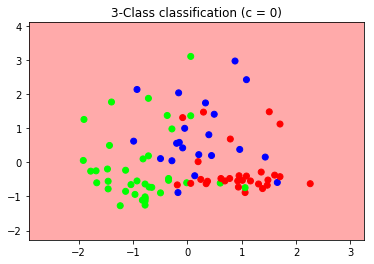

Result for validation split with c=  0.001   41.66666666666667 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


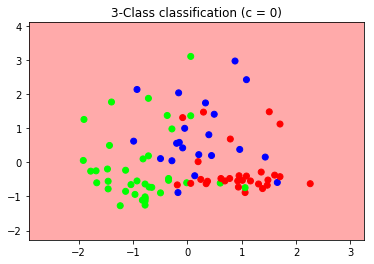

Result for validation split with c=  0.01   41.66666666666667 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


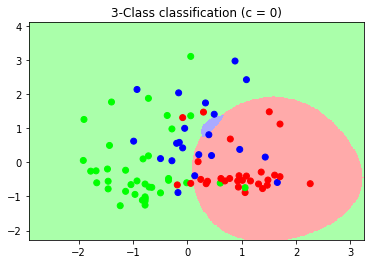

Result for validation split with c=  0.1   38.88888888888889 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


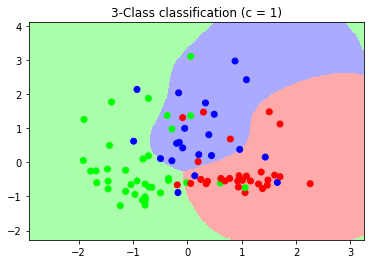

Result for validation split with c=  1   72.22222222222221 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


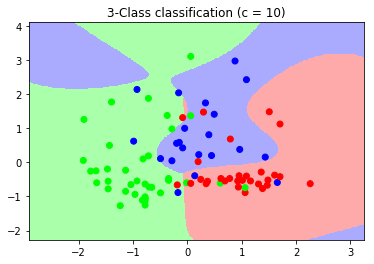

Result for validation split with c=  10   66.66666666666666 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


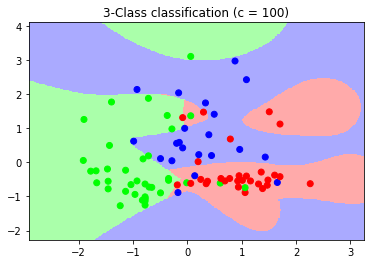

Result for validation split with c=  100   66.66666666666666 %


/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


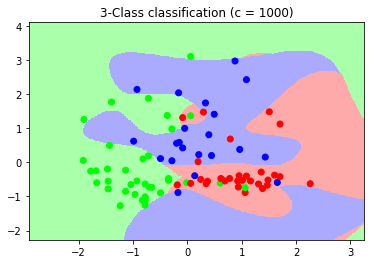

Result for validation split with c=  1000   69.44444444444444 %


In [22]:
accuracies = []
for c in C:    
    modelSVM = svm.SVC(C=c, kernel='rbf')
    modelSVM.fit(Data_train[:,:2], Target_train)
    
    #Plotting boundaries
    plot_boundaries_svm(modelSVM, Data_train, Target_train, c)
    
    #Predicting on validation split
    predictions_valid = modelSVM.predict(Data_validation[:, :2])
    score_valid = (predictions_valid[predictions_valid==Target_validation].sum())/len(Target_validation)
    print("Result for validation split with c= ",c," ",score_valid*100,"%")
    accuracies.append(score_valid)

In [23]:
best_c = np.argmax(accuracies)
best_c = C[best_c]
print("Best value is ",best_c)

Best value is  1


### Evaluating on the test set

In [24]:
modelSVM = svm.SVC(C=best_c, kernel='rbf')
modelSVM.fit(Data_train[:,:2], Target_train)

/home/carlo/anaconda3/envs/cntk-py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
test_predictions = modelSVM.predict(Data_test[:, :2])
score_test = (test_predictions[test_predictions==Target_test].sum())/len(Target_test)
print("Result for test set with c = ",best_c," ",score_test*100,"%")

Result for test set with c =  1   81.48148148148148 %


### Grid search

Setting values for gamma (l)

In [26]:
L = [0.1, 0.03, 0.01, 0.001, 0.0001]

In [27]:
accuracies = []
for c in C:
    accuracies.append([])
    for l in L:
        modelSVM = svm.SVC(C=c, kernel='rbf', gamma=l)
        modelSVM.fit(Data_train[:,:2], Target_train)
    
        #Predicting on validation split
        predictions_valid = modelSVM.predict(Data_validation[:, :2])
        score_valid = (predictions_valid[predictions_valid==Target_validation].sum())/len(Target_validation)
        print("Result for validation split with c= ",c," and l= ",l," ",score_valid*100,"%")
        accuracies[len(accuracies)-1].append(score_valid)

Result for validation split with c=  0.001  and l=  0.1   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.01   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.001   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.0001   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.1   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.01   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.001   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.0001   41.66666666666667 %
Result for validation split with c=  0.1  and l=  0.1   41.66666666666667 %
Result for validation split with c=  0.1  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.1  and l=  0.01   4

Searching for best values of c and l

In [28]:
best_c = 0
best_l = 0
for c in range(len(C)):
    l = np.argmax(accuracies[c])
    if accuracies[c][l] > accuracies[best_c][best_l]:
        best_c = c
        best_l = l
best_c = C[best_c]
best_l = L[best_l]
print("Best value for c = ",best_c)
print("Best value for l = ",best_l)

Best value for c =  1
Best value for l =  0.1


### Evaluating on the test set

In [29]:
modelSVM = svm.SVC(C=best_c, kernel='rbf', gamma=best_l)
modelSVM.fit(Data_train[:,:2], Target_train)
    
test_predictions = modelSVM.predict(Data_test[:, :2])
score_test = (test_predictions[test_predictions==Target_test].sum())/len(Target_test)
print("Result for test set with c = ",best_c," and l = ",best_l," ",score_test*100,"%")

Result for test set with c =  1  and l =  0.1   74.07407407407408 %


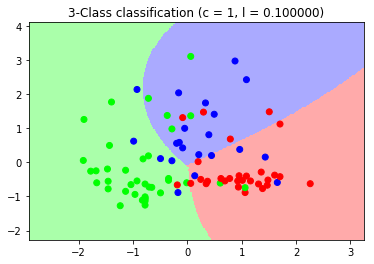

In [31]:
#Plotting boundaries
plot_boundaries_svm(modelSVM, Data_train, Target_train, best_c, best_l)

## K_Fold

### Merging train and validation split

In [32]:
Data_train_valid = np.concatenate((Data_train, Data_validation))
Target_train_valid = np.concatenate((Target_train, Target_validation))

### Hyperparameters

Computing number of samples to take in each k-fold validation iteration

In [33]:
n_samples = int(20/100*len(Target_train_valid))
print(n_samples)

24


In [34]:
accuracies = []
for c in C:
    accuracies.append([])
    for l in L:
        score_valids = []
        for i in range(5):
            
            #Extracting validation samples
            starting_index = i*n_samples
            Data_validation = Data_train_valid[starting_index:starting_index+n_samples]
            Target_validation = Target_train_valid[starting_index:starting_index+n_samples]
            
            #Extracting remaining samples
            Data_train_tmp = np.concatenate((Data_train_valid[:starting_index], Data_train_valid[starting_index+n_samples:]))
            Target_train_tmp = np.concatenate((Target_train_valid[:starting_index], Target_train_valid[starting_index+n_samples:]))
            
            #Fitting train set
            modelSVM = svm.SVC(C=c, kernel='rbf', gamma=l)
            modelSVM.fit(Data_train_tmp[:,:2], Target_train_tmp)
    
            #Predicting on validation split
            predictions_valid = modelSVM.predict(Data_validation[:, :2])
            score_valids.append((predictions_valid[predictions_valid==Target_validation].sum())/len(Target_validation))
            
        #Computing mean of result for current values of hyperparameters
        score_valid = (sum(score_valids))/5
        print("Result for validation split with c= ",c," and l= ",l," ",score_valid*100,"%")
        accuracies[len(accuracies)-1].append(score_valid)

Result for validation split with c=  0.001  and l=  0.1   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.01   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.001   41.66666666666667 %
Result for validation split with c=  0.001  and l=  0.0001   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.1   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.01   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.001   41.66666666666667 %
Result for validation split with c=  0.01  and l=  0.0001   41.66666666666667 %
Result for validation split with c=  0.1  and l=  0.1   39.16666666666667 %
Result for validation split with c=  0.1  and l=  0.03   41.66666666666667 %
Result for validation split with c=  0.1  and l=  0.01   4

Searching for best values of c and l

In [35]:
best_c = 0
best_l = 0
for c in range(len(C)):
    l = np.argmax(accuracies[c])
    if accuracies[c][l] > accuracies[best_c][best_l]:
        best_c = c
        best_l = l
best_c = C[best_c]
best_l = L[best_l]
print("Best value for c = ",best_c)
print("Best value for l = ",best_l)

Best value for c =  1000
Best value for l =  0.1


### Evaluating on the test set

In [36]:
modelSVM = svm.SVC(C=best_c, kernel='rbf', gamma=best_l)
modelSVM.fit(Data_train_valid[:,:2], Target_train_valid)
    
test_predictions = modelSVM.predict(Data_test[:, :2])
score_test = (test_predictions[test_predictions==Target_test].sum())/len(Target_test)
print("Result for test set with c = ",best_c," and l = ",best_l," ",score_test*100,"%")

Result for test set with c =  1000  and l =  0.1   75.92592592592592 %
